In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(".\CareerMapping.csv")

In [3]:
X = data.drop('Role', axis=1)  # Features
y = data['Role']  # Target variable


In [4]:
y

0       Database Administrator
1       Database Administrator
2       Database Administrator
3       Database Administrator
4       Database Administrator
                 ...          
9174         Graphics Designer
9175         Graphics Designer
9176         Graphics Designer
9177         Graphics Designer
9178         Graphics Designer
Name: Role, Length: 9179, dtype: object

In [5]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [6]:
y

array([6, 6, 6, ..., 7, 7, 7])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

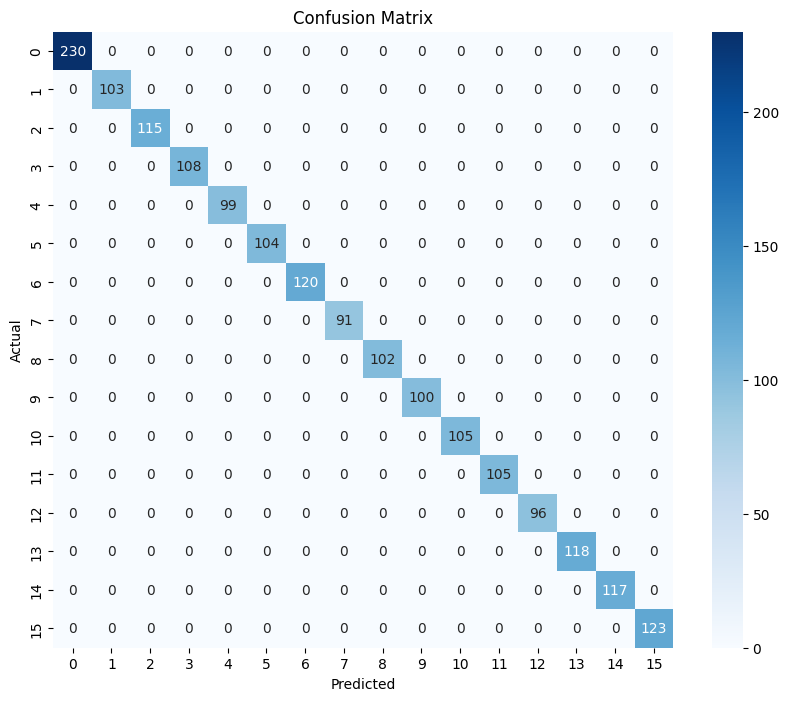

In [9]:
predictions = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [10]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [23]:
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       230
           1       1.00      1.00      1.00       103
           2       1.00      1.00      1.00       115
           3       1.00      1.00      1.00       108
           4       1.00      1.00      1.00        99
           5       1.00      1.00      1.00       104
           6       1.00      1.00      1.00       120
           7       1.00      1.00      1.00        91
           8       1.00      1.00      1.00       102
           9       1.00      1.00      1.00       100
          10       1.00      1.00      1.00       105
          11       1.00      1.00      1.00       105
          12       1.00      1.00      1.00        96
          13       1.00      1.00      1.00       118
          14       1.00      1.00      1.00       117
          15       1.00      1.00      1.00       123

    accuracy                           1.00      1836
   macro avg       1.00   

In [12]:
num_folds = 5

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=num_folds, scoring='accuracy')

# Step 5: Print the cross-validation scores
print("Cross-validation scores:", scores)

# Step 6: Calculate and print the mean accuracy and standard deviation of the scores
mean_accuracy = scores.mean()
std_accuracy = scores.std()


In [16]:
print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)

Mean Accuracy: 1.0
Standard Deviation of Accuracy: 0.0


In [20]:
rf_model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],       # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required to be at a leaf node
}

# Step 6: Perform grid search using cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Step 7: Get the best hyperparameters and evaluate the model
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Step 8: Evaluate the model on the test set using the best hyperparameters
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy with Best Hyperparameters:", accuracy)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Test Accuracy with Best Hyperparameters: 1.0


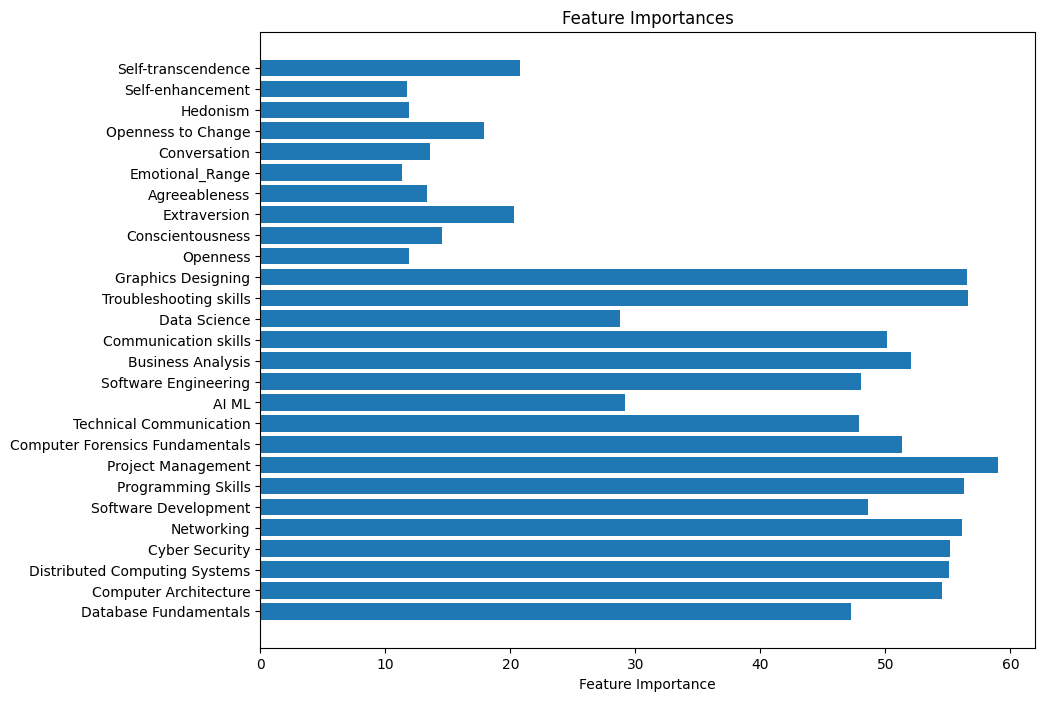

In [11]:
a=model.feature_importances_

data = a * 1000
labels = ['Database Fundamentals', 'Computer Architecture',
       'Distributed Computing Systems', 'Cyber Security', 'Networking',
       'Software Development', 'Programming Skills', 'Project Management',
       'Computer Forensics Fundamentals', 'Technical Communication', 'AI ML',
       'Software Engineering', 'Business Analysis', 'Communication skills',
       'Data Science', 'Troubleshooting skills', 'Graphics Designing',
       'Openness', 'Conscientousness', 'Extraversion', 'Agreeableness',
       'Emotional_Range', 'Conversation', 'Openness to Change', 'Hedonism',
       'Self-enhancement', 'Self-transcendence']

indices = range(len(data))

plt.figure(figsize=(10, 8))
plt.barh(indices, data, align='center')
plt.yticks(indices, labels)
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.show()